In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px


pd.options.display.float_format='{:,.2f}'.format
data=pd.read_csv('zoopla_edinburgh.csv')
data.index.rename('property_index',inplace=True)
data.shape

In [ ]:
#Converting string data to datetime.date


data['available_from']=pd.to_datetime(data['available_from'],errors='coerce')
data['available_from']=data['available_from'].dt.date
data['incorporation_date']=pd.to_datetime(data['incorporation_date'],errors='coerce')
data['incorporation_date']=data['incorporation_date'].dt.date



In [34]:
#Brief analysis about number of letting agents 
#and number of properties available to rent
# In total there are 121 agents and 2228 properties

number_of_agents=data['letting_agent_name'].value_counts().count()
number_of_properties=data['letting_agent_name'].value_counts().sum()
print('Number of agents: {}'.format(number_of_agents))
print('Number of properties: {}'.format(number_of_properties))

Number of agents: 121
Number of properties: 2228


In [35]:
#Market share in % for the 10 biggest agencies
#It can be seen that OpenRent and Homelike Internet GmbH are the two biggest, encompasing 33% of the market. As far 
# as I know these are short term let agencies.
# Looking at the rest of the agencies, it is evident the no agency has a dominant stake of the rent market.
market_share=data['letting_agent_name'].value_counts().head(10)/data['letting_agent_name'].value_counts().sum()
market_share=market_share.rename('Market share by agency. First 10 agencies')
market_share

OpenRent                                     0.20
Homelike Internet GmbH                       0.13
Braemore Sales and Lettings                  0.06
DJ Alexander Lettings Ltd                    0.04
Southside Property Management                0.04
Murray & Currie Property                     0.04
Grant Property                               0.04
Staykeepers                                  0.03
Zone Letting Limited                         0.02
Northwood Residential Lettings (Edinburgh)   0.02
Name: Market share by agency. First 10 agencies, dtype: float64

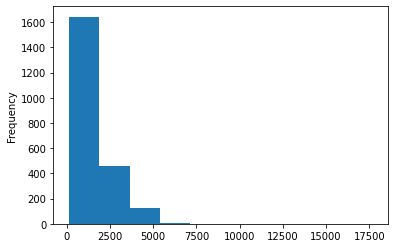

In [36]:
#First histogram of rent prices
#There are some outliers which price is above 5000 pounds and that affects the shape of the histogram. Let's 
#get rid of them

data['price'].plot(kind='hist')
plt.show()


#Most of the properties have rents below 2500pcm

In [37]:
#There are some outliers which price is above 5000 pounds and that affects the shape of the histogram. Let's 
#get rid of them
data=data.query('price<=5000')


Text(0.5, 1.0, 'Distribution of rent (properties below 5000 pcm) [pcm]')

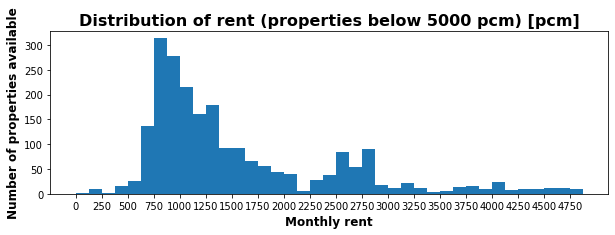

In [38]:
#Histogram with rents below 5000pcm
#Most of the properties on rent have prices in between 500 and 2000 pounds,
#being the peak around 750 poundss

fig,ax=plt.subplots(figsize=(10,3))

data_less_5000=data[data['price']<=5000]

ax.hist(data_less_5000['price'],bins=np.arange(0,5000,125))
ax.set_xticks(np.arange(0,5000,250))
ax.set_xlabel('Monthly rent',fontsize=12,fontweight='heavy')
ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
ax.set_title('Distribution of rent (properties below 5000 pcm) [pcm]',
fontsize=16,fontweight='heavy')

#There is a huge offer for properties from above 750pcm

C:\Users\usuario\AppData\Local\Temp/ipykernel_6428/3944202515.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\usuario\AppData\Local\Temp/ipykernel_6428/3944202515.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Waiting time distribution [days]')

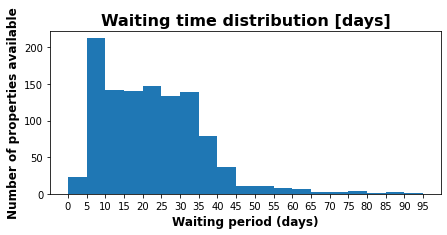

In [39]:
#Most of the properties are available in the first 40 days of publication
fig,ax=plt.subplots(figsize=(7,3))

data_with_no_na=data[data['available_from'].notna()]
data_with_no_na['waiting_period_days']=data_with_no_na['available_from']-data_with_no_na['incorporation_date']
data_with_no_na['waiting_period_days']=data_with_no_na['waiting_period_days'].apply(lambda x: x.days)
waiting_period_days_after_3_days=data_with_no_na.query("waiting_period_days<100 & waiting_period_days>3")['waiting_period_days']


ax.hist(waiting_period_days_after_3_days,bins=range(0,100,5))

ax.set_xlabel('Waiting period (days)',fontsize=12,fontweight='heavy')
ax.set_xticks(np.arange(0,100,5))

ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
ax.set_title('Waiting time distribution [days]',fontsize=16,fontweight='heavy')




Let's do the same analysis segmenting by different types of properties and prices

In [40]:
#Splitting the properties in four different segments accoirding to their price

data_500_1000=data.query('price>500 & price<=1000')
data_1000_1500=data.query('price>1000 & price<=1500')
data_1500_2000=data.query('price>1500 & price<=2000')
data_2000_3000=data.query('price>2000 & price<=3000')

data_with_no_na_500_1000=data_with_no_na.query('price>500 & price<=1000')
data_with_no_na_1000_1500=data_with_no_na.query('price>1000 & price<=1500')
data_with_no_na_1500_2000=data_with_no_na.query('price>1500 & price<=2000')
data_with_no_na_2000_3000=data_with_no_na.query('price>2000 & price<=3000')

Text(0.5, 0, 'Availability (2000-3000pcm) [days]')

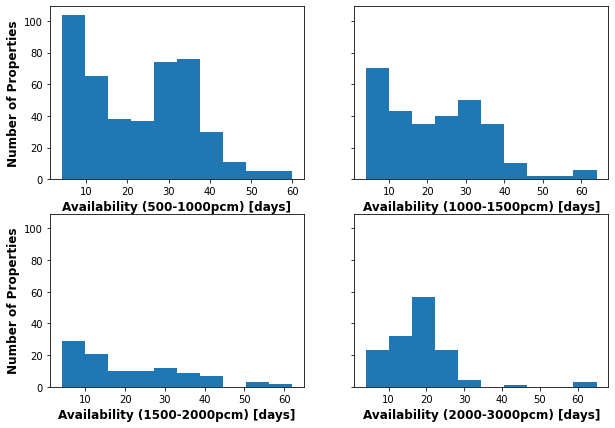

In [41]:
#If we segment the properties by price there is no relevant difference in the waiting time for properties worth
#below 1500 pounds. For properties worth above 1500 pounds there are less immediately available properties but
#most of them can be occupied within 40 days

fig,ax=plt.subplots(2,2,figsize=(10,7),sharey=True)
ax[0,0].hist(data_with_no_na_500_1000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[0,1].hist(data_with_no_na_1000_1500.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[1,0].hist(data_with_no_na_1500_2000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[1,1].hist(data_with_no_na_2000_3000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])

ax[0,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')
ax[1,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')

ax[0,0].set_xlabel('Availability (500-1000pcm) [days]',fontsize=12,fontweight='heavy')
ax[0,1].set_xlabel('Availability (1000-1500pcm) [days]',fontsize=12,fontweight='heavy')
ax[1,0].set_xlabel('Availability (1500-2000pcm) [days]',fontsize=12,fontweight='heavy')
ax[1,1].set_xlabel('Availability (2000-3000pcm) [days]',fontsize=12,fontweight='heavy')

#Seems that in most cases the properties are available to be taken in the first 30 days,
#except for the properties above 2000pcm. The waiting time is under 20 days for most of them

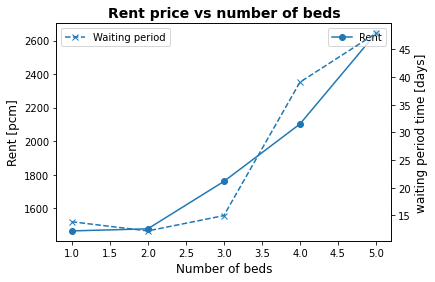

In [42]:
# It can be seen a rising in average waiting time and price with the number of bedrooms when this goes above 2.
data_by_beds=data_with_no_na.groupby('number_of_beds')[['price','waiting_period_days']].agg({'price':['count','mean'],'waiting_period_days':'mean'})
data_by_beds=data_by_beds.query('number_of_beds<=5') #We limit the number of beds to 5 because the number above this distortes the analysis
fig,ax=plt.subplots()
ax.plot(data_by_beds.index,data_by_beds['price']['mean'],linestyle='-',marker='o',label='Rent')

ax.set_xlabel('Number of beds',fontsize=12)
ax.set_ylabel('Rent [pcm]',fontsize=12)
ax.set_title('Rent price vs number of beds',fontsize=14,fontweight='heavy')
ax.legend(loc=1)
ax2=ax.twinx()
ax2.plot(data_by_beds.index,data_by_beds['waiting_period_days']['mean'],linestyle='--',marker='x',label='Waiting period')
ax2.set_ylabel('waiting period time [days]',fontsize=12)
ax2.legend(loc=0)

Text(0.5, 1.0, 'Rent price vs number of baths')

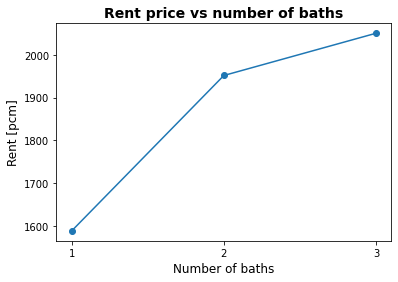

In [43]:
#Same with baths as with beds
data_by_baths=data_with_no_na.groupby('number_of_baths')[['price','waiting_period_days']].agg({'price':['count','mean'],'waiting_period_days':'mean'})
data_by_baths=data_by_baths.query('number_of_baths<=3')

fig,ax=plt.subplots()
ax.plot(data_by_baths.index,data_by_baths['price']['mean'],linestyle='-',marker='o')
ax.set_xticks([1,2,3])
ax.set_xlabel('Number of baths',fontsize=12)
ax.set_ylabel('Rent [pcm]',fontsize=12)
ax.set_title('Rent price vs number of baths',fontsize=14,fontweight='heavy')

Text(0.5, 0, 'Date')

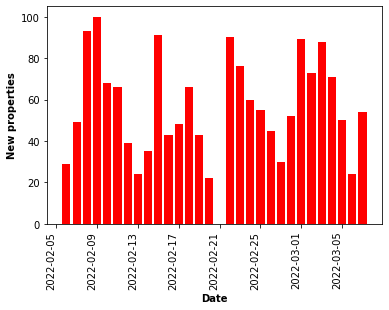

In [44]:
#Sundays are the day when least properties are published and then it starts increasing towards 
#the days reaching its peak on Wenesdays
plt.bar(data.groupby('incorporation_date').count()['price'][1:].index,data.groupby('incorporation_date').count()['price'][1:],linestyle='--',
color='r',linewidth=5)
plt.xticks(rotation=90,ha='right')
plt.ylabel('New properties',fontweight='heavy')
plt.xlabel('Date',fontweight='heavy')


Text(0, 0.5, 'Number of properties')

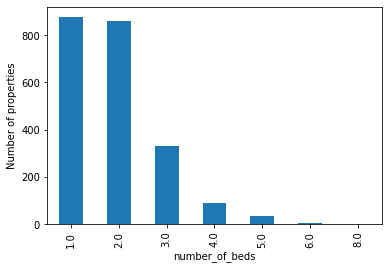

In [97]:
data.groupby('number_of_beds')['price'].count().plot(kind='bar')
plt.xticks(range(0,7))
plt.ylabel('Number of properties')


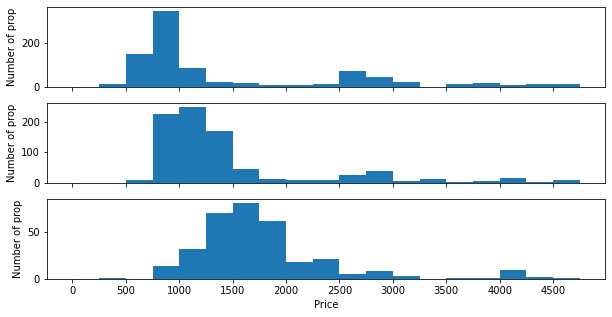

In [111]:
#There is a displacement to the right in the price mode with the increase in number of bedrooms
fig,ax=plt.subplots(3,1,figsize=(10,5),sharex=True)
ax[0].hist(data.query('number_of_beds==1')['price'],bins=range(0,5000,250))
ax[1].hist(data.query('number_of_beds==2')['price'],bins=range(0,5000,250))
ax[2].hist(data.query('number_of_beds==3')['price'],bins=range(0,5000,250))

ax[2].set_xticks(range(0,5000,500))
ax[2].set_xlabel('Price')

for i in range (0,3):
    ax[i].set_ylabel('Number of prop')


In [90]:
#Map with all the properties

with open('mapbox_token.txt','r') as file:
    mapbox_token=file.read()

px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(data,lat=data['latitude'],lon=data['longitude'],hover_name=data['price'],zoom=10,
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        color='price')
fig.show()

In [73]:
#Properties with one bedroom
#The dataset is segmented in between properties worth less than 1500 pounds and properties worth more than that value.
#This is done because the bulk of properties worth less than 1500 pounds, therefore, including the high valued
#properties would distort the color scale and make difficult to spot any pattern.

#It can be seen that the most expensive areas for Edinburgh are Stockbridge, Broughton, New and Old towns, Tollcross and Fountainbridge. However, 
# this tendency is not very defined for properties with one bedroom. I can be seen that even in the most pricey 
#areas it's possible to find cheaper properties. That is and important insight from a tenant perspective,
#for whom is possible to find a property to rent in the city centre without and additional cost.
data_1500=data.query('price<=1500 & price>600 & number_of_beds==1')
data_1500_5000=data.query('price>1500 & number_of_beds==1')

fig = px.scatter_mapbox(data_1500,lat=data_1500['latitude'],lon=data_1500['longitude'],hover_name=data_1500['price'],\
                        zoom=10,\
                        color_continuous_scale=px.colors.cyclical.IceFire,\
                        color='price')

# This plot is made to find out where are located the most expensive properties.
#It seems that most of them are close to the city centre but beyond that there is no pattern.
fig2 = px.scatter_mapbox(data_1500_5000,lat=data_1500_5000['latitude'],lon=data_1500_5000['longitude'],\
                        hover_name=data_1500_5000['price'],zoom=10,\
                        color_continuous_scale=px.colors.cyclical.IceFire,\
                        color='price')


fig.show()
fig2.show()

In [112]:
#Properties with two bedrooms

#The most expensive areas for properties which have two bedrooms are Stockbridge, Dean Village, New and Old towns and Marchmont.
#In this case the areas are more defined than for properties with one bedroom.

data_1750=data.query('price<=1750 & price>500 & number_of_beds==2')
data_1750_5000=data.query('price>1750 & number_of_beds==2')

px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(data_1750,lat=data_1750['latitude'],lon=data_1750['longitude'],hover_name=data_1750['price'],zoom=10,
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        color='price')


# This plot is made to find out where are located the most expensive properties.
#It seems that most of them are close to the city centre but beyond that there is no pattern
fig2 = px.scatter_mapbox(data_1750_5000,lat=data_1750_5000['latitude'],lon=data_1750_5000['longitude'],hover_name=data_1750_5000['price'],zoom=10,
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        color='price')
fig.show()
fig2.show()

In [113]:
#In the case of 3 bedrooms properties Stockbridge and New Towns are stills expensive areas to rent.
#Also, it starts to be noticeable that the price decreaces with the increa in the distance to the city centre 

data_3000=data.query('price<=3000 & price>500 & number_of_beds==3')
px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(data_3000,lat=data_3000['latitude'],lon=data_3000['longitude'],hover_name=data_3000['price'],zoom=10,
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        color='price')
fig.show()

Text(0.5, 0, '3 rooms')

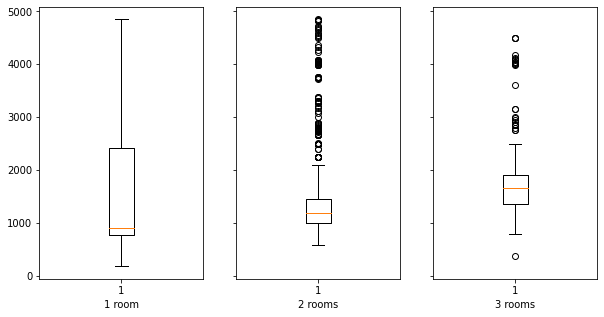

In [51]:
#It can be observed a slight increase of the average property price with the increase in the number of rooms,
#but the dispersion of the data high enough to make this average price meaningless.
fig,ax=plt.subplots(1,3,figsize=(10,5),sharey=True)

bedrooms_1=data.query('number_of_beds==1')['price']
bedrooms_2=data.query('number_of_beds==2')['price']
bedrooms_3=data.query('number_of_beds==3')['price']

bedrooms_1.reset_index(drop=True,inplace=True)
bedrooms_2.reset_index(drop=True,inplace=True)
bedrooms_3.reset_index(drop=True,inplace=True)

bedrooms=pd.concat([bedrooms_1,bedrooms_2,bedrooms_3],axis=1,ignore_index=True)
bedrooms.rename(columns={0:'1',1:'2',2:'3'})
ax[0].boxplot(bedrooms[0])
ax[1].boxplot(bedrooms[1][bedrooms[1].notna()])
ax[2].boxplot(bedrooms[2][bedrooms[2].notna()])

ax[0].set_xlabel('1 room')
ax[1].set_xlabel('2 rooms')
ax[2].set_xlabel('3 rooms')




<AxesSubplot:>

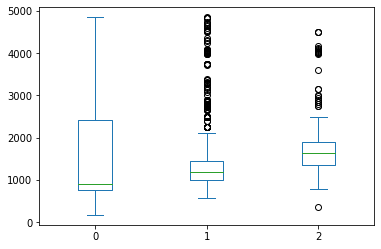

In [52]:
bedrooms.plot(kind='box')

In [53]:
data.head()

,address,available_from,description,features,images,incorporation_date,letting_agent_name,number_of_baths,number_of_beds,price,property_url,title,latitude,longitude
property_index,,,,,,,,,,,,,,
0,"Huntingdon Place, Broughton EH7",2022-02-25,Deposit £300 - Lovely two double bedroom flat ...,Furnished Central Heating Private Parking Show...,https://lid.zoocdn.com/u/480/360/99950c25e3c4f...,2022-02-05,DJ Alexander Lettings Ltd,NaN,2.00,900.00,https://www.zoopla.co.uk/to-rent/details/60695...,2 bed flat to rent,55.96,-3.18
1,"Bruntsfield Place, Bruntsfield, Edinburgh EH10",2022-02-22,Due to covid-19 and social distancing measures...,Unfurnished Fridge Freezer Dishwasher Central ...,https://lid.zoocdn.com/u/480/360/1d28b2da09fc0...,2022-02-05,Cullen Property,1.00,2.00,"1,350.00",https://www.zoopla.co.uk/to-rent/details/60690...,2 bed flat to rent,55.94,-3.20
2,"Elm Row, Hillside, Edinburgh EH7",2022-02-11,This is a very presentable property with a bri...,Unfurnished Fridge Freezer Shower No Smoking E...,https://lid.zoocdn.com/u/480/360/26f006625854c...,2022-02-05,Burgh Property,2.00,2.00,995.00,https://www.zoopla.co.uk/to-rent/details/60690...,2 bed flat to rent,55.96,-3.18
3,"West Winnelstrae, Edinburgh EH5",2022-02-05,Property Reference: 1315088. Fully furnished m...,Furnished No Agent Fees Property Reference Num...,https://lid.zoocdn.com/u/480/360/1c19f78fbd8d3...,2022-02-05,OpenRent,1.00,1.00,825.00,https://www.zoopla.co.uk/to-rent/details/60691...,1 bed flat to rent,55.97,-3.23
4,"Donaldson Drive, Edinburgh EH12",2022-02-05,Xtra Mile Property Solutions: One bed part fur...,Part furnished Dishwasher Washer Dryer Electri...,https://lid.zoocdn.com/u/480/360/2488fe80b4e01...,2022-02-05,Extra Mile Property Solutions Limited,NaN,1.00,"1,100.00",https://www.zoopla.co.uk/to-rent/details/60690...,1 bed flat to rent,55.95,-3.23
